In [2]:
# import tensorflow as tf
import keras

Using TensorFlow backend.


In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Predictions with Deep Learning models/Churn Modeling.csv")

<IPython.core.display.Javascript object>

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [11]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# geography

In [73]:
train_sample = pd.concat([x, geography, gender], axis=1)

<IPython.core.display.Javascript object>

In [74]:
train_sample.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [75]:
train_sample = train_sample.drop(['Geography', 'Gender'], axis=1)

In [76]:
train_sample.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [77]:
import seaborn as sns

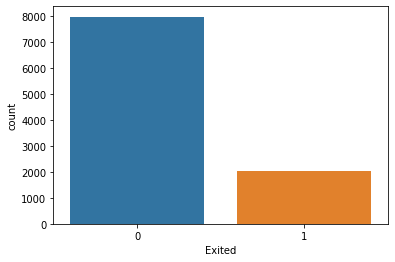

In [78]:
sns.countplot(y)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(train_sample, y, test_size=0.2, random_state = 12)

In [81]:
model1 = LogisticRegression()

In [82]:
model1.fit(x_train, y_train)

LogisticRegression()

In [83]:
predict = model1.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [85]:
print(confusion_matrix(y_test, predict))

[[1540   24]
 [ 415   21]]


In [86]:
print(accuracy_score(y_test, predict))
print(recall_score(y_test, predict))
print(precision_score(y_test, predict))

0.7805
0.0481651376146789
0.4666666666666667


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler(feature_range=(0,1))
train_sample2 = scaler.fit_transform(train_sample)

In [89]:
train_sample.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [90]:
train_sample2 = pd.DataFrame(train_sample2, columns = train_sample.columns)
train_sample2

<IPython.core.display.Javascript object>

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0


In [91]:
x_train, x_test, y_train, y_test = train_test_split(train_sample, y, test_size=0.2, random_state = 12)

In [92]:
model1 = LogisticRegression()

In [93]:
model1.fit(x_train, y_train)

LogisticRegression()